In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist         # библиотека базы выборок Mnist
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
# стандартизация входных данных
x_train = x_train / 255
x_test = x_test / 255

y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

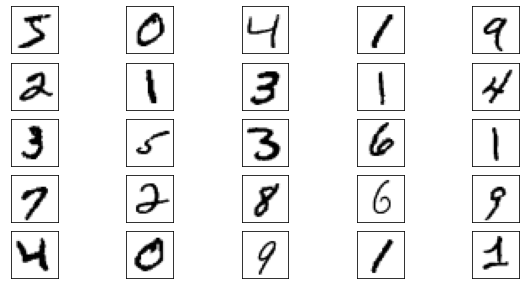

In [4]:
# отображение первых 25 изображений из обучающей выборки
plt.figure(figsize=(10,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)

plt.show()

In [5]:
model = keras.Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

print(model.summary())      # вывод структуры НС в консоль

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


In [6]:
model.compile(optimizer='adam',
             loss='mse',
             metrics=['accuracy'])


model.fit(x_train, y_train_cat, batch_size=32, epochs=5, validation_split=0.2)


Epoch 1/5
1500/1500 [==============================] - 5s 2ms/step - loss: 0.0133 - accuracy: 0.9134 - val_loss: 0.0074 - val_accuracy: 0.9538
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0064 - accuracy: 0.9596 - val_loss: 0.0069 - val_accuracy: 0.9554
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0046 - accuracy: 0.9710 - val_loss: 0.0050 - val_accuracy: 0.9673
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0037 - accuracy: 0.9777 - val_loss: 0.0053 - val_accuracy: 0.9645
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0030 - accuracy: 0.9819 - val_loss: 0.0046 - val_accuracy: 0.9698


In [7]:
model.evaluate(x_test, y_test_cat)

313/313 [==============================] - 1s 2ms/step - loss: 0.0040 - accuracy: 0.9731


[0.004017147235572338, 0.9731000065803528]

[[1.6074304e-07 1.1410223e-05 9.9991667e-01 3.2250193e-06 5.5921522e-14
  2.7536623e-07 5.2619866e-06 2.9350691e-12 6.3068161e-05 6.8771296e-13]]
2


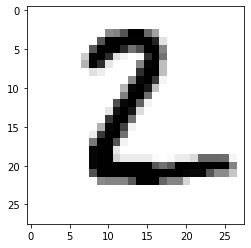

In [8]:
n = 1
x = np.expand_dims(x_test[n], axis=0)
res = model.predict(x)
print( res )
print( np.argmax(res) )

plt.imshow(x_test[n], cmap=plt.cm.binary)
plt.show()

In [9]:
# Распознавание всей тестовой выборки
pred = model.predict(x_test)
pred = np.argmax(pred, axis=1)

print(pred.shape)

print(pred[:20])
print(y_test[:20])

(10000,)
[7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 8 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


In [10]:
# Выделение неверных вариантов
mask = pred == y_test
print(mask[:10])

x_false = x_test[~mask]
y_false = x_test[~mask]

print(x_false.shape)

[ True  True  True  True  True  True  True  True False  True]
(269, 28, 28)


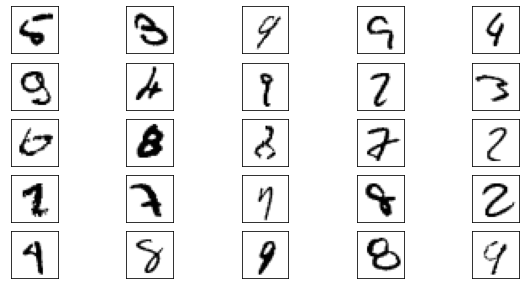

In [11]:
# Вывод первых 25 неверных результатов
plt.figure(figsize=(10,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_false[i], cmap=plt.cm.binary)

plt.show()